# Prüfung
Bitte organisiert euch für die Prüfung als Gruppe von zwei bis drei Leuten und **schickt mir als Gruppe eine Email mit den Informationen mit dem gewünschten Prüfungstermin (18.06. oder 30.07.) und den Gruppenmitgliedern im Betreff der Email**. 

Muster:

Anmeldung Prüfung - 18.06. - Anna A und Max M

Ich teile euch dann euren Zeitslot und euer Präsentationsthema mit. 

In [1]:
setwd("~//praxiskurs_fss21/")
options(repr.plot.width=8, repr.plot.height=3,repr.plot.res = 300)
library(ggplot2)
library(ggcorrplot)

library(magrittr)
library(tidyr)
library(plotly)
library(dplyr)


Attaching package: 'tidyr'


The following object is masked from 'package:magrittr':

    extract



Attaching package: 'plotly'


The following object is masked from 'package:ggplot2':

    last_plot


The following object is masked from 'package:stats':

    filter


The following object is masked from 'package:graphics':

    layout



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
download.file("https://covid.ourworldindata.org/data/owid-covid-data.csv", "data/owid-covid-data.csv")

In [3]:
df_covid <- read.csv("data/RKI_COVID19.csv")
df_owid <- read.csv("data/owid-covid-data.csv")

In [4]:
df_owid$date <- as.Date(df_owid$date)
df_covid$Meldedatum <- as.Date(df_covid$Meldedatum)
dates <- seq(min(df_covid$Meldedatum)-3, max(df_covid$Meldedatum), by="day") 
df_complete  <- data.frame(dates = dates )
df_complete$cases_per_day <- sapply(dates, function(date) sum(df_covid$AnzahlFall[df_covid$Meldedatum == date])  )
df_complete$runmean_cases <- caTools::runmean(df_complete$cases_per_day, k=7, align="center")
df_complete$deaths_per_day <- sapply(dates, function(date) sum(df_covid$AnzahlTodesfall[df_covid$Meldedatum == date])  )
df_complete$runmean_deaths <- caTools::runmean(df_complete$deaths_per_day, k=7, align="center")
df_complete <- df_complete[dates<=max(df_covid$Meldedatum),]

Warning message:
"Removed 4290 row(s) containing missing values (geom_path)."


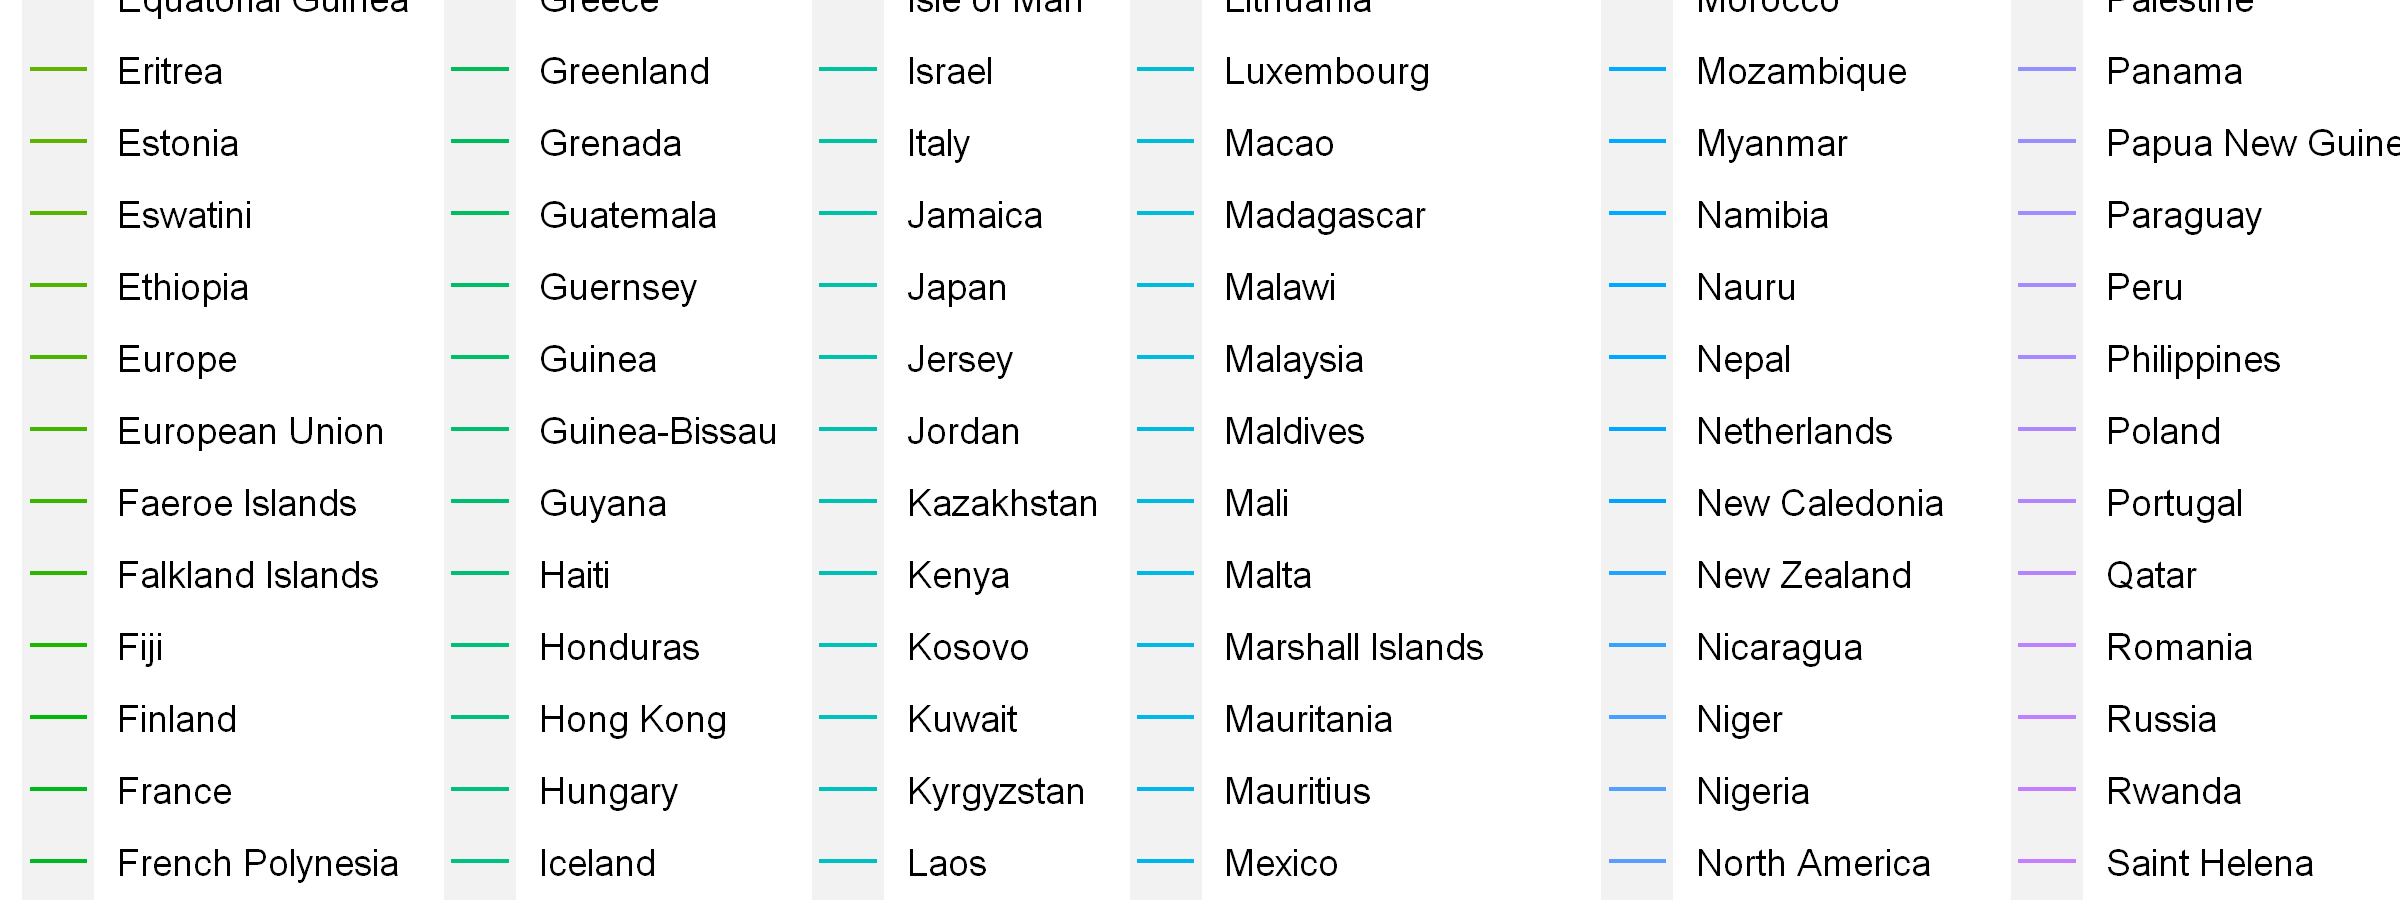

In [5]:
#ggplotly(
    ggplot(df_owid, aes(x=date,y=new_cases_smoothed_per_million,color=location)) + geom_path()
#)

In [6]:
df_vacc <-  df_owid  %>% 
    dplyr::filter(continent=="Europe") %>%
    dplyr::filter(date>="2021-01-01") %>% 
    dplyr::select(c(location,date,new_vaccinations_smoothed_per_million)) %>% 
    tidyr::pivot_wider(names_from= location, values_from=new_vaccinations_smoothed_per_million)
df_vacc %>% head

date,Albania,Andorra,Austria,Belarus,Belgium,Bosnia and Herzegovina,Bulgaria,Croatia,Cyprus,...,San Marino,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Ukraine,United Kingdom,Vatican
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2021-01-01,NA,NA,95,43,11,NA,145,269,NA,...,NA,NA,NA,498,NA,190,NA,NA,NA,NA
2021-01-02,NA,NA,79,43,9,NA,115,269,NA,...,NA,NA,NA,448,NA,190,NA,NA,NA,NA
2021-01-03,NA,NA,68,43,7,NA,97,269,NA,...,NA,NA,NA,422,NA,190,NA,NA,NA,NA
2021-01-04,NA,NA,49,43,6,NA,85,252,NA,...,NA,NA,NA,390,NA,234,NA,NA,2684,NA
2021-01-05,NA,NA,52,43,27,NA,77,241,NA,...,NA,NA,78,474,1209,277,NA,NA,2684,NA
2021-01-06,NA,NA,44,43,69,NA,68,325,NA,...,NA,NA,606,811,968,321,NA,NA,2684,NA


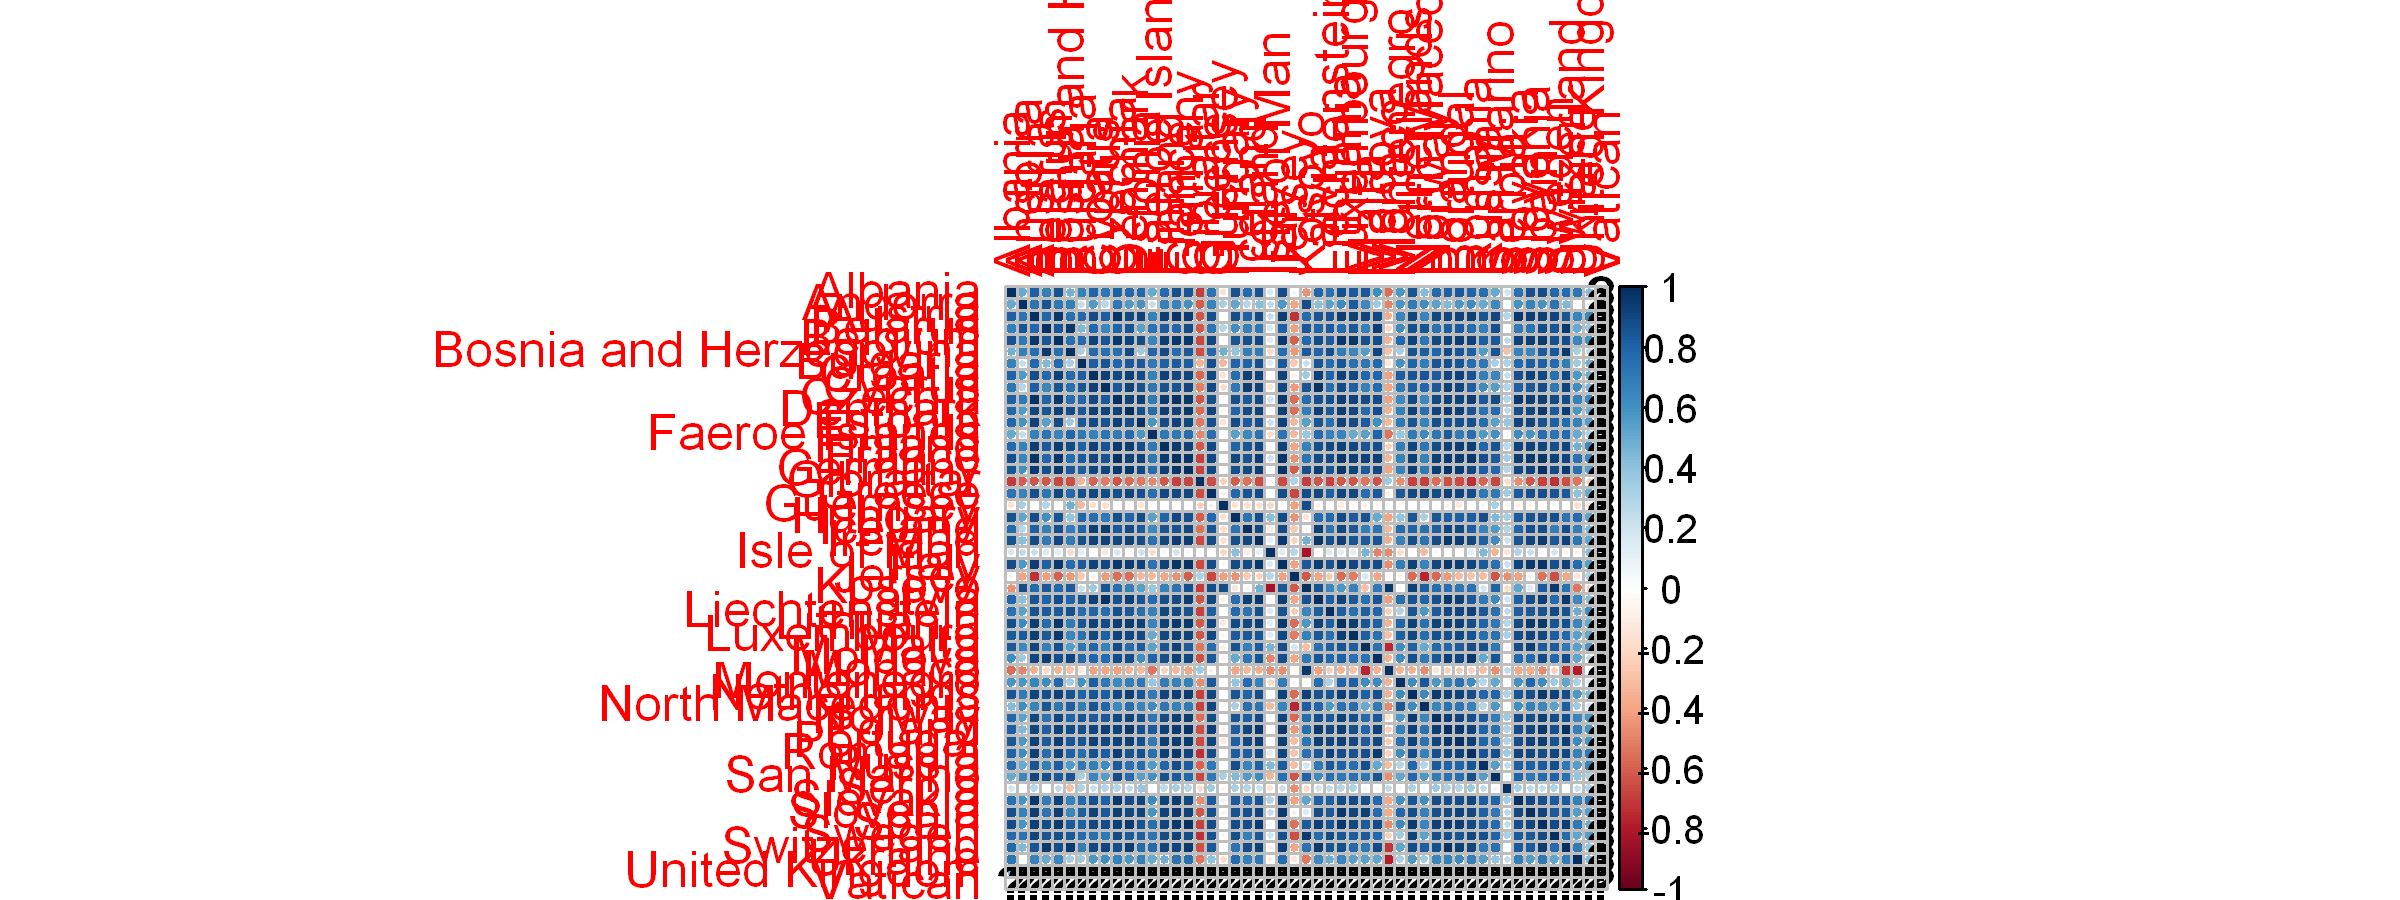

In [7]:
corr_matrix <- df_vacc %>% dplyr::select(-date) %>% cor(use="pairwise.complete.obs")
corrplot::corrplot(corr_matrix)

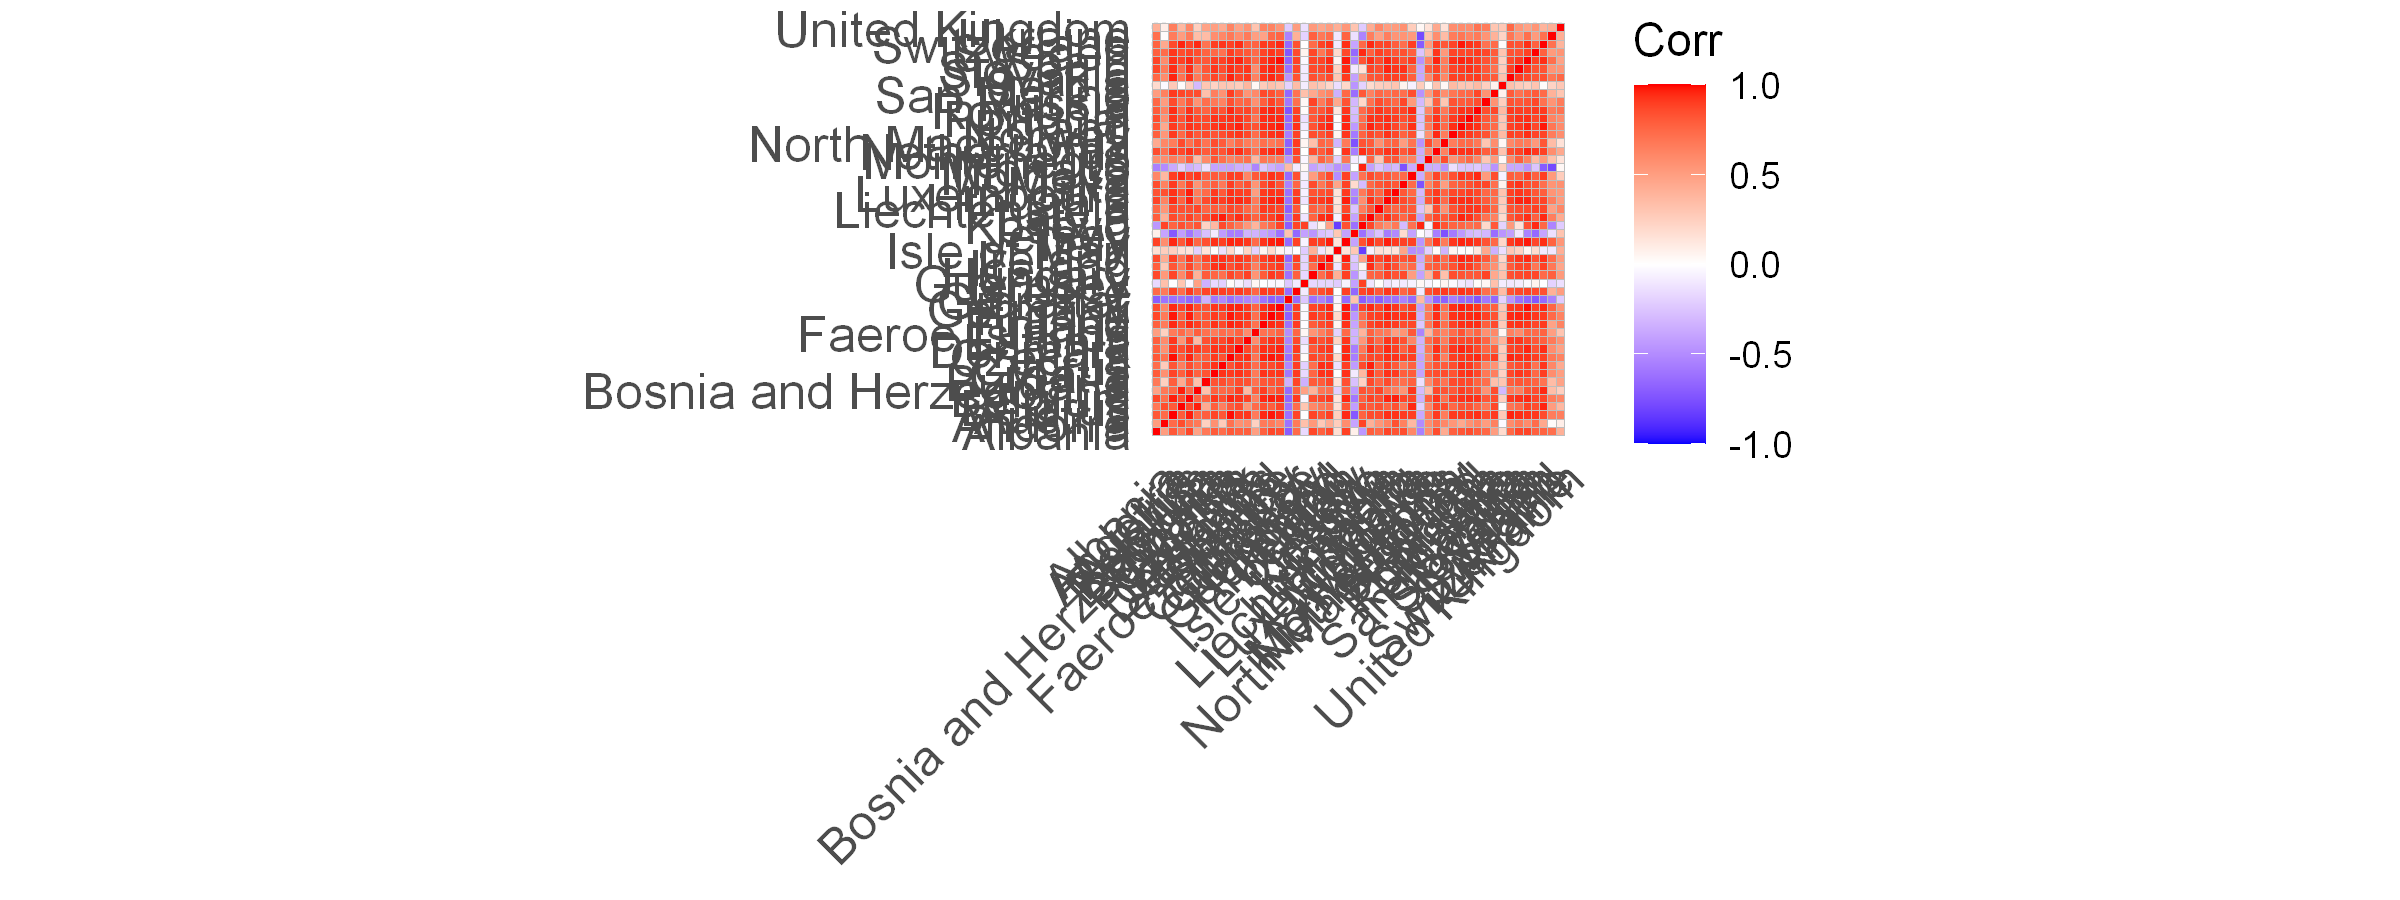

In [8]:
ggcorrplot::ggcorrplot(corr_matrix) 

In [9]:
names(df_owid)

[1] "iso_code"                             
 [2] "continent"                            
 [3] "location"                             
 [4] "date"                                 
 [5] "total_cases"                          
 [6] "new_cases"                            
 [7] "new_cases_smoothed"                   
 [8] "total_deaths"                         
 [9] "new_deaths"                           
[10] "new_deaths_smoothed"                  
[11] "total_cases_per_million"              
[12] "new_cases_per_million"                
[13] "new_cases_smoothed_per_million"       
[14] "total_deaths_per_million"             
[15] "new_deaths_per_million"               
[16] "new_deaths_smoothed_per_million"      
[17] "reproduction_rate"                    
[18] "icu_patients"                         
[19] "icu_patients_per_million"             
[20] "hosp_patients"                        
[21] "hosp_patients_per_million"            
[22] "weekly_icu_admissions"                
[23] "weekly_icu_admissions_per_million"    
[24] "weekly_hosp_admissions"               
[25] "weekly_hosp_admissions_per_million"   
[26] "new_tests"                            
[27] "total_tests"                          
[28] "total_tests_per_thousand"             
[29] "new_tests_per_thousand"               
[30] "new_tests_smoothed"                   
[31] "new_tests_smoothed_per_thousand"      
[32] "positive_rate"                        
[33] "tests_per_case"                       
[34] "tests_units"                          
[35] "total_vaccinations"                   
[36] "people_vaccinated"                    
[37] "people_fully_vaccinated"              
[38] "new_vaccinations"                     
[39] "new_vaccinations_smoothed"            
[40] "total_vaccinations_per_hundred"       
[41] "people_vaccinated_per_hundred"        
[42] "people_fully_vaccinated_per_hundred"  
[43] "new_vaccinations_smoothed_per_million"
[44] "stringency_index"                     
[45] "population"                           
[46] "population_density"                   
[47] "median_age"                           
[48] "aged_65_older"                        
[49] "aged_70_older"                        
[50] "gdp_per_capita"                       
[51] "extreme_poverty"                      
[52] "cardiovasc_death_rate"                
[53] "diabetes_prevalence"                  
[54] "female_smokers"                       
[55] "male_smokers"                         
[56] "handwashing_facilities"               
[57] "hospital_beds_per_thousand"           
[58] "life_expectancy"                      
[59] "human_development_index"

Warning message:
"Ignoring unknown aesthetics: text"
Warning message:
"Removed 69 rows containing missing values (geom_point)."


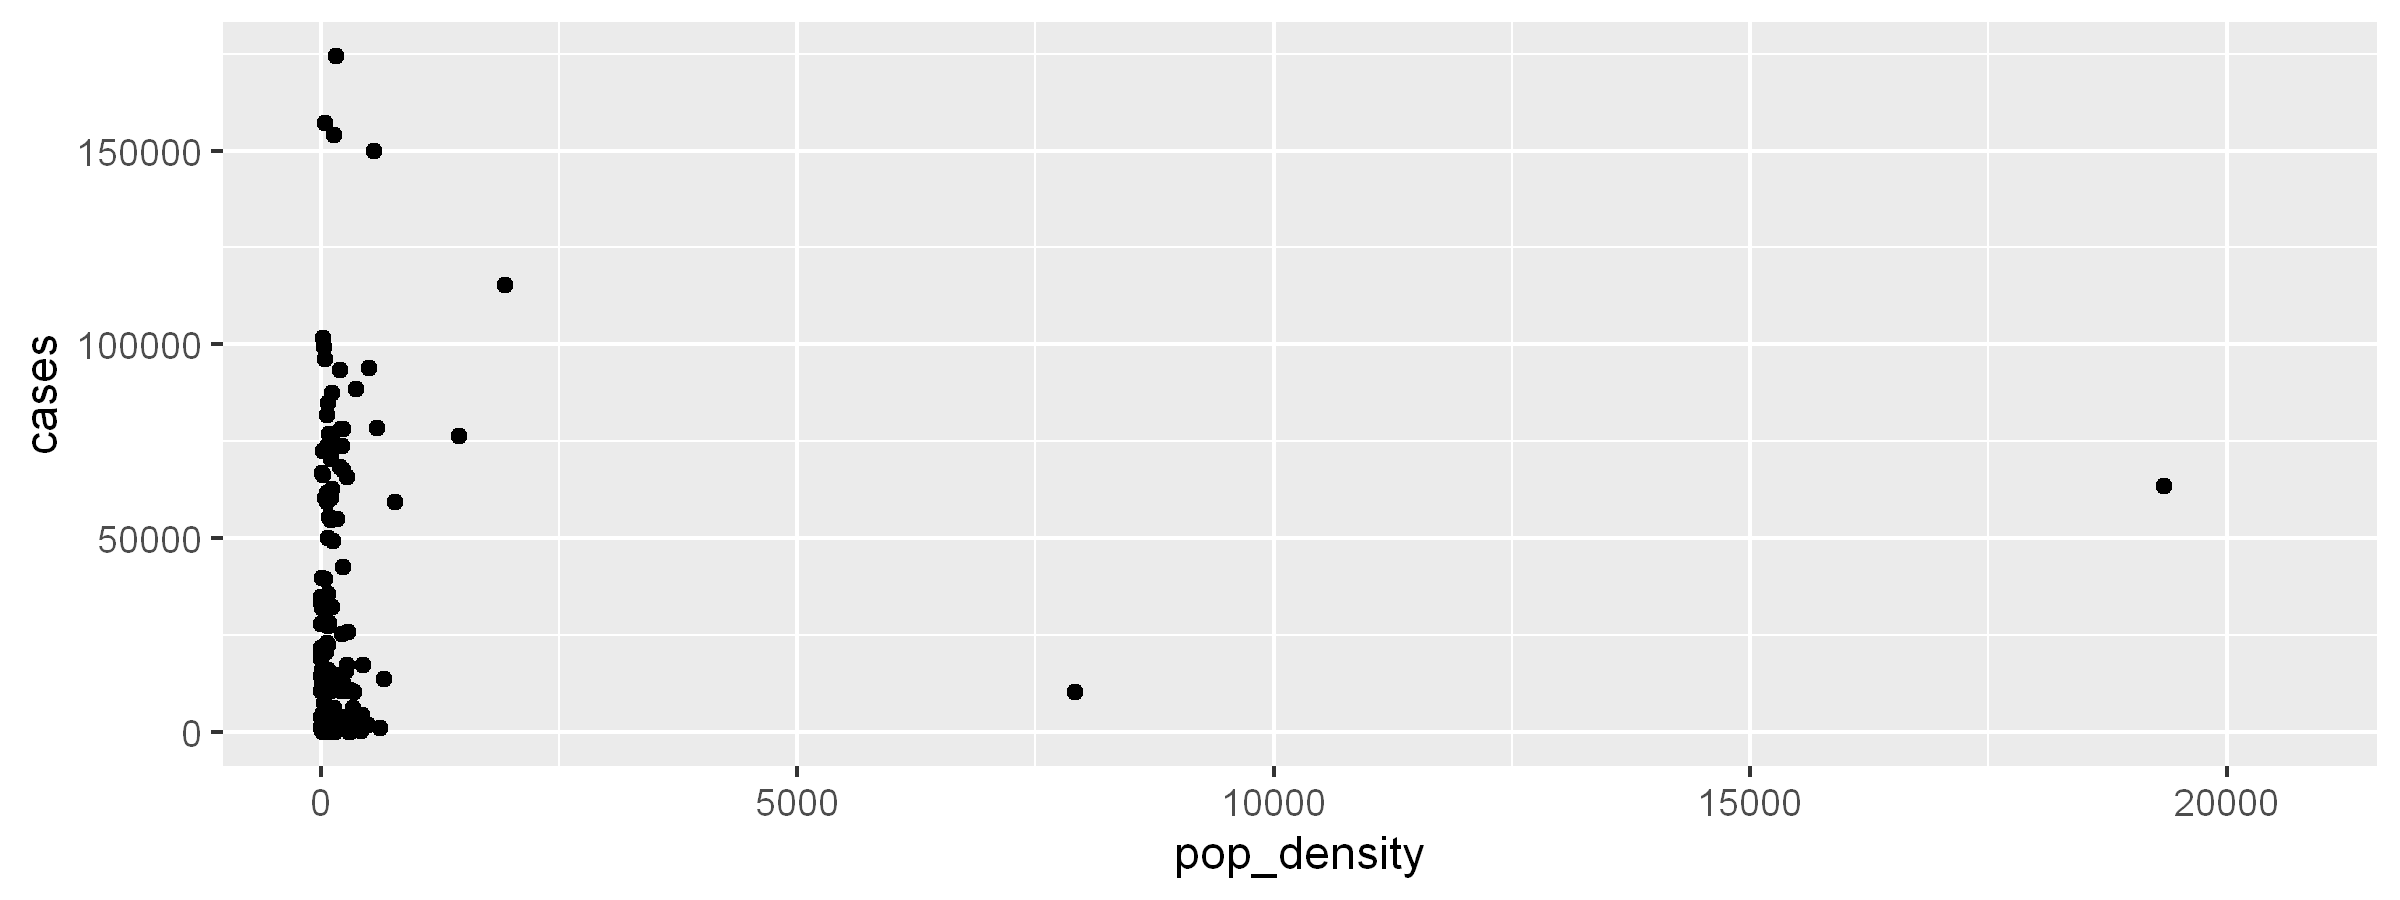

In [11]:
#ggplotly(
    ggplot(df_owid %>% 
           group_by(location) %>% 
           summarise(pop_density = population_density[1], cases = max(total_cases_per_million) )) +
    geom_point(aes(x=pop_density,y=cases, text = location))
#    ,    tooltip=c("text","x","y")
#    )  

In [12]:
cols <- df_owid %>% names


In [13]:
suppressWarnings(
    factors <- df_owid %>% group_by(location) %>%
    dplyr::summarise_at( c("total_cases_per_million","total_deaths_per_million", cols[44:length(cols)]),max,na.rm=T) %>% 
    mutate(ifr=total_deaths_per_million/total_cases_per_million)
    )

In [14]:
head(factors)

location,total_cases_per_million,total_deaths_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,ifr
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,1619.514,69.898,84.26,38928341,54.422,18.6,2.581,1.337,1803.987,-Inf,597.029,9.59,-Inf,-Inf,37.746,0.50,64.83,0.511,0.043159862
Africa,3480.851,93.687,-Inf,1340598113,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,0.026914970
Albania,45830.148,843.005,89.81,2877800,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,-Inf,2.89,78.57,0.795,0.018394115
Algeria,2848.028,76.509,92.13,43851043,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748,0.026863851
Andorra,174335.081,1643.694,65.74,77265,163.755,-Inf,-Inf,-Inf,-Inf,-Inf,109.135,7.97,29.0,37.8,-Inf,-Inf,83.73,0.868,0.009428361
Angola,903.510,19.747,90.74,32866268,23.890,16.8,2.405,1.362,5819.495,-Inf,276.045,3.94,-Inf,-Inf,26.664,-Inf,61.15,0.581,0.021855873


In [15]:
factors <- factors  %>% 
    mutate(across(!location,function(col) replace(col,is.infinite(col),NA) ))

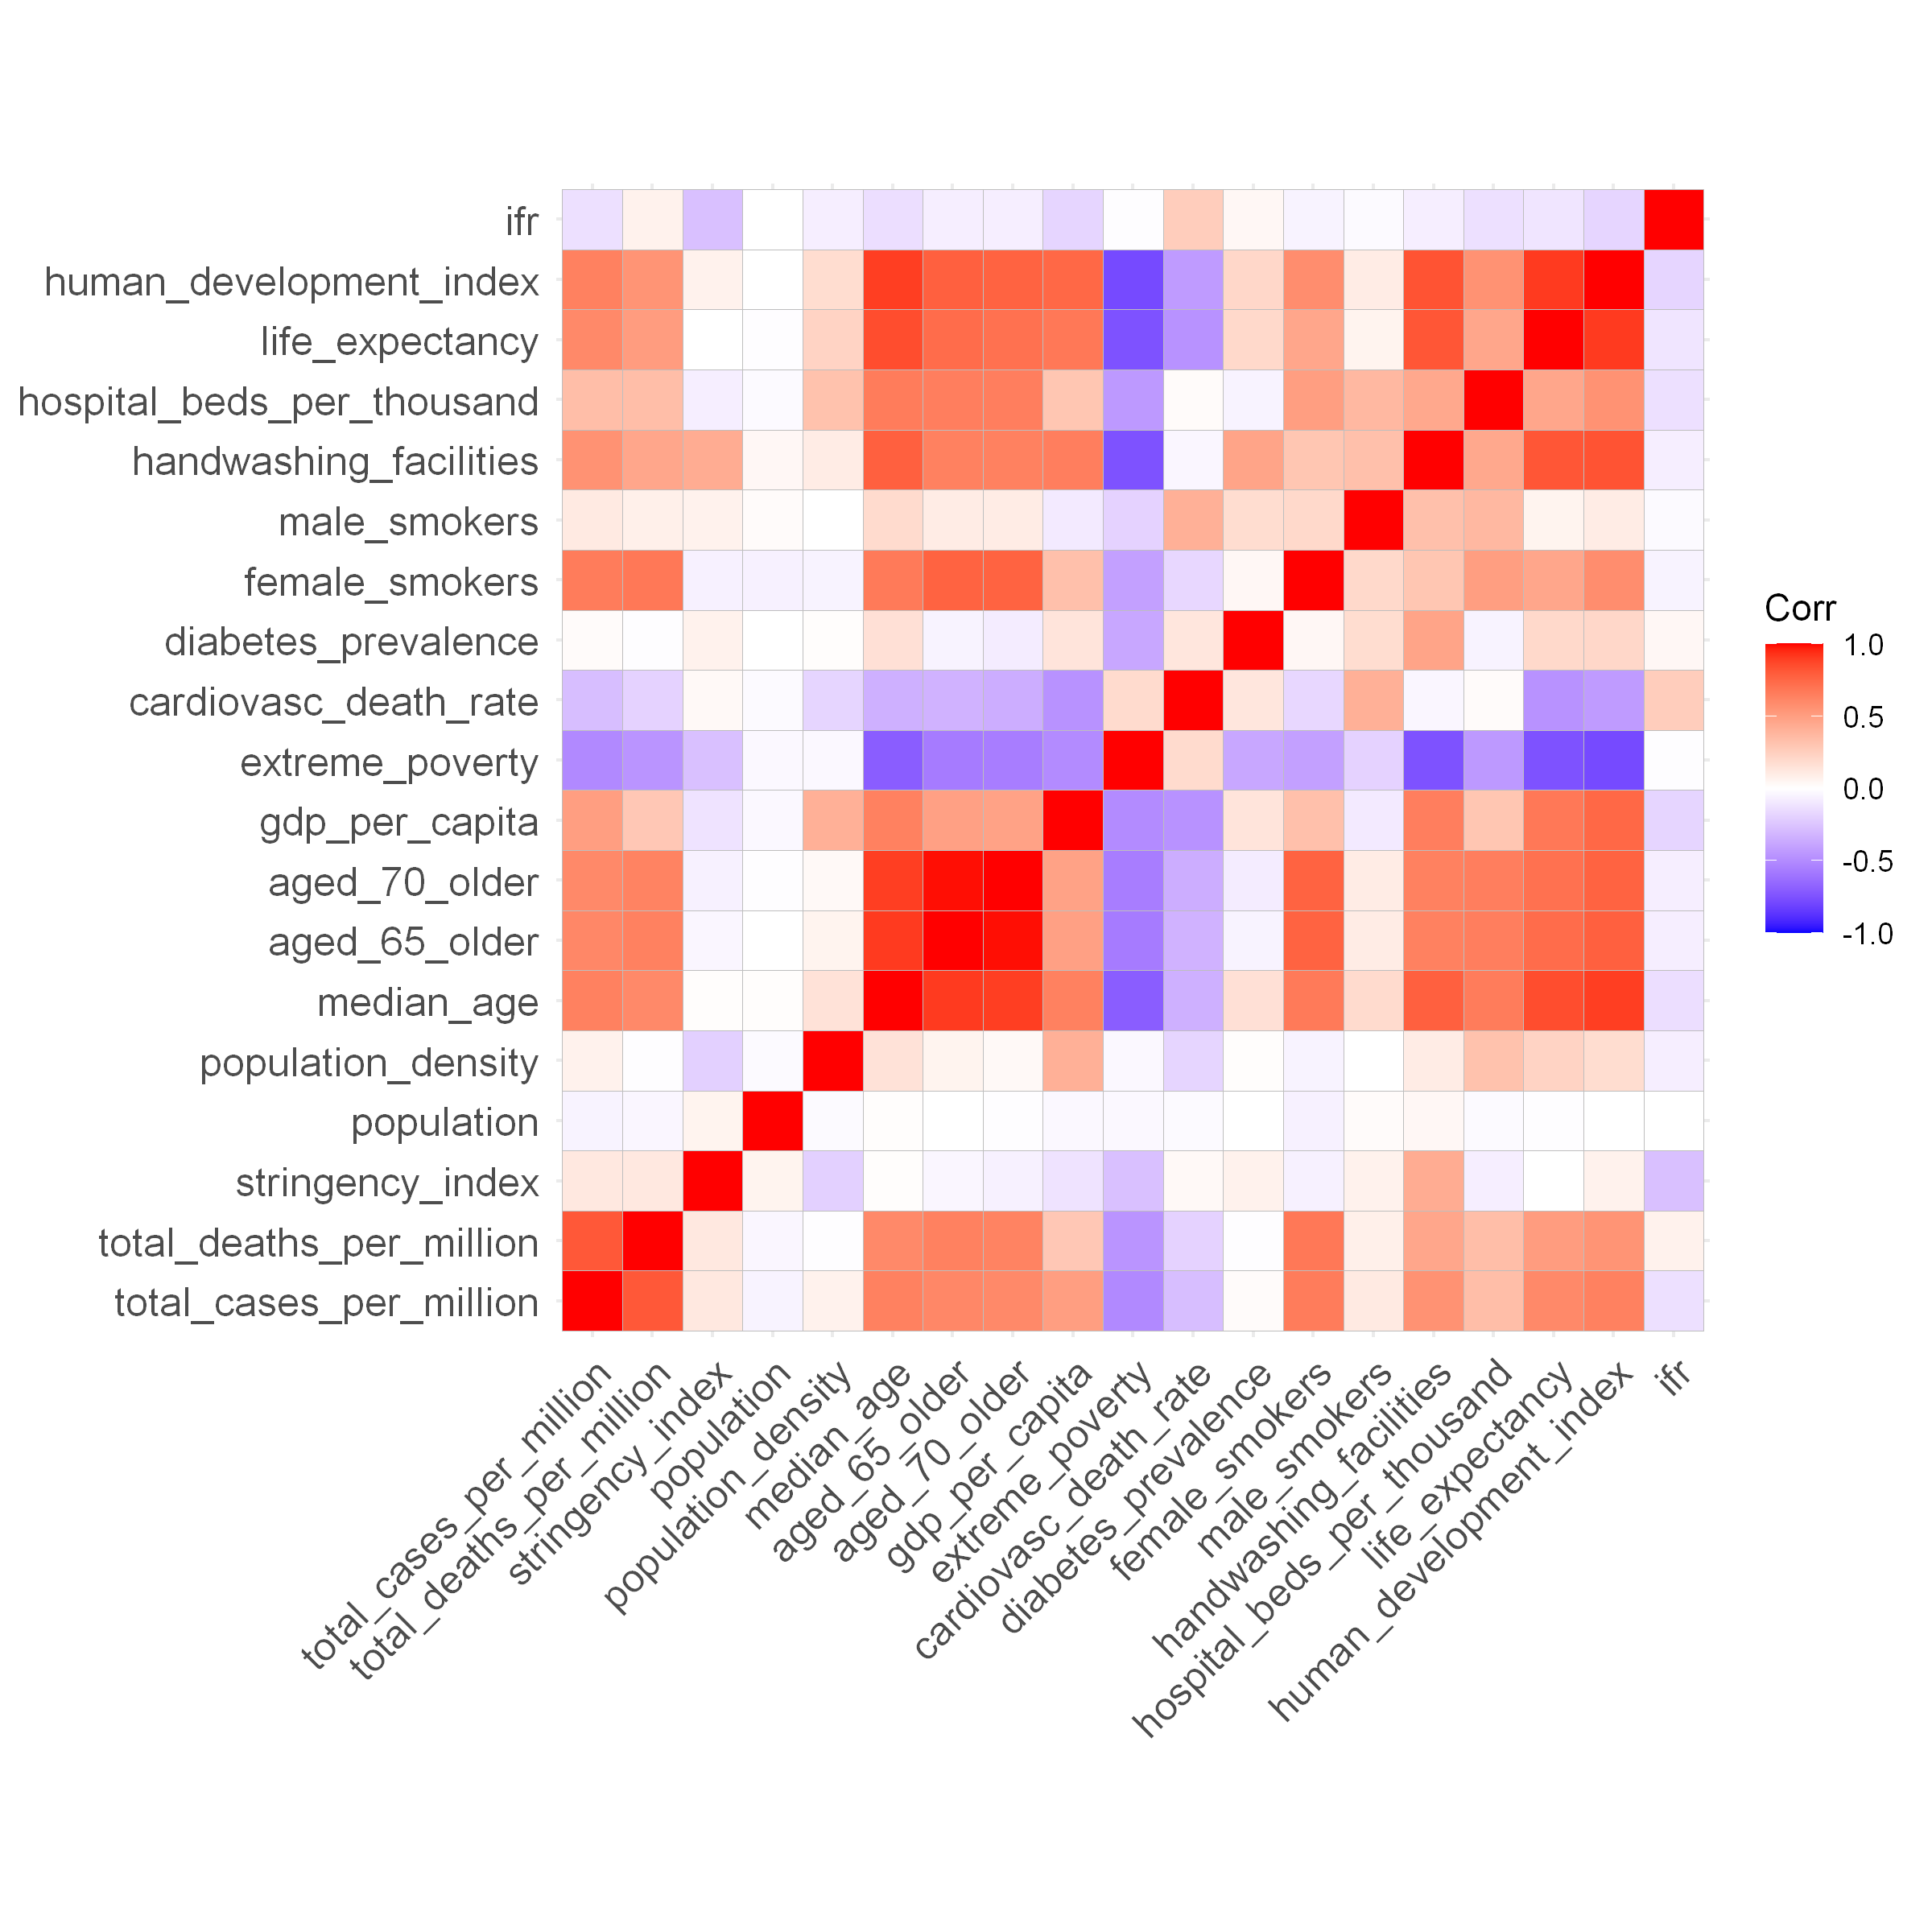

In [16]:
options(repr.plot.width=8, repr.plot.height=8,repr.plot.res = 300)

factors %>% 
    dplyr::select(-location) %>% 
    cor(use="pairwise.complete.obs") %>% 
    ggcorrplot()

Warning message:
"Ignoring unknown aesthetics: text"
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 52 rows containing missing values (geom_point)."


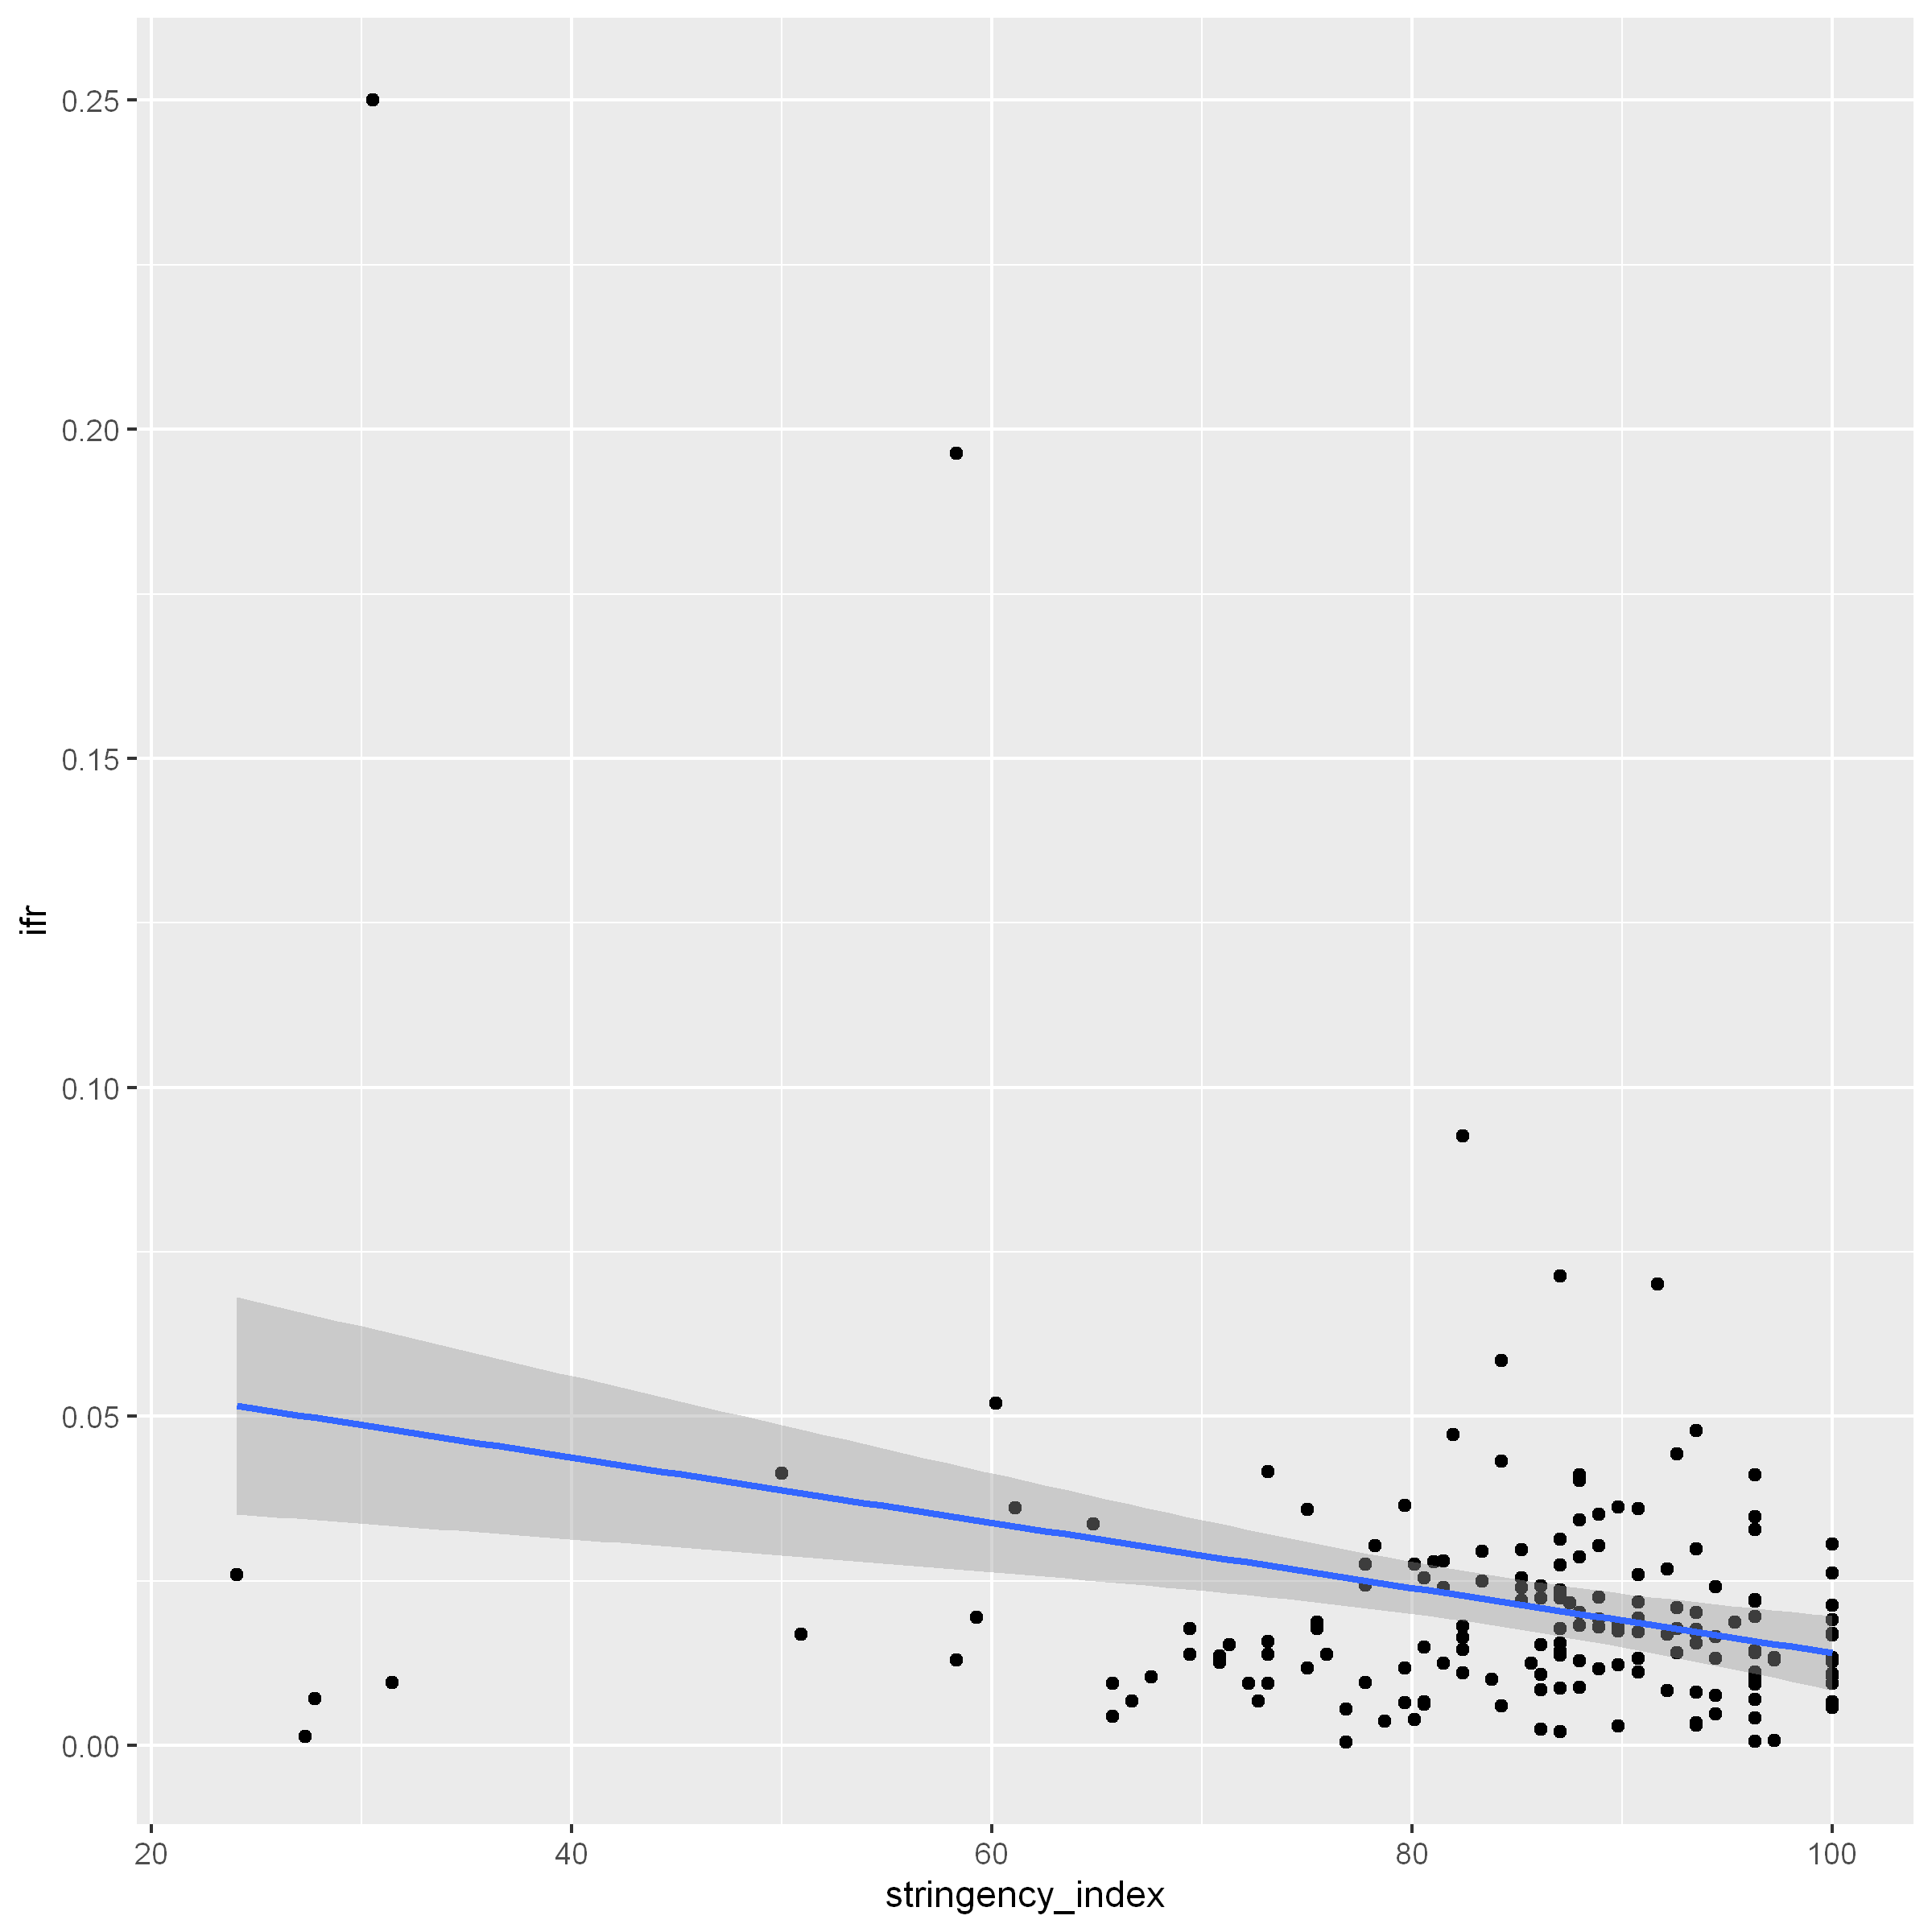

In [18]:
#ggplotly(
    ggplot(factors) +  geom_point(aes(x=stringency_index,y=ifr,text=location)) +
        geom_smooth(aes(x=stringency_index,y=ifr),method="lm",na.rm=T)
#    ,tooltip=c("text","x","y")
#    ) 

Warning message:
"Ignoring unknown aesthetics: text"
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 32 rows containing missing values (geom_point)."


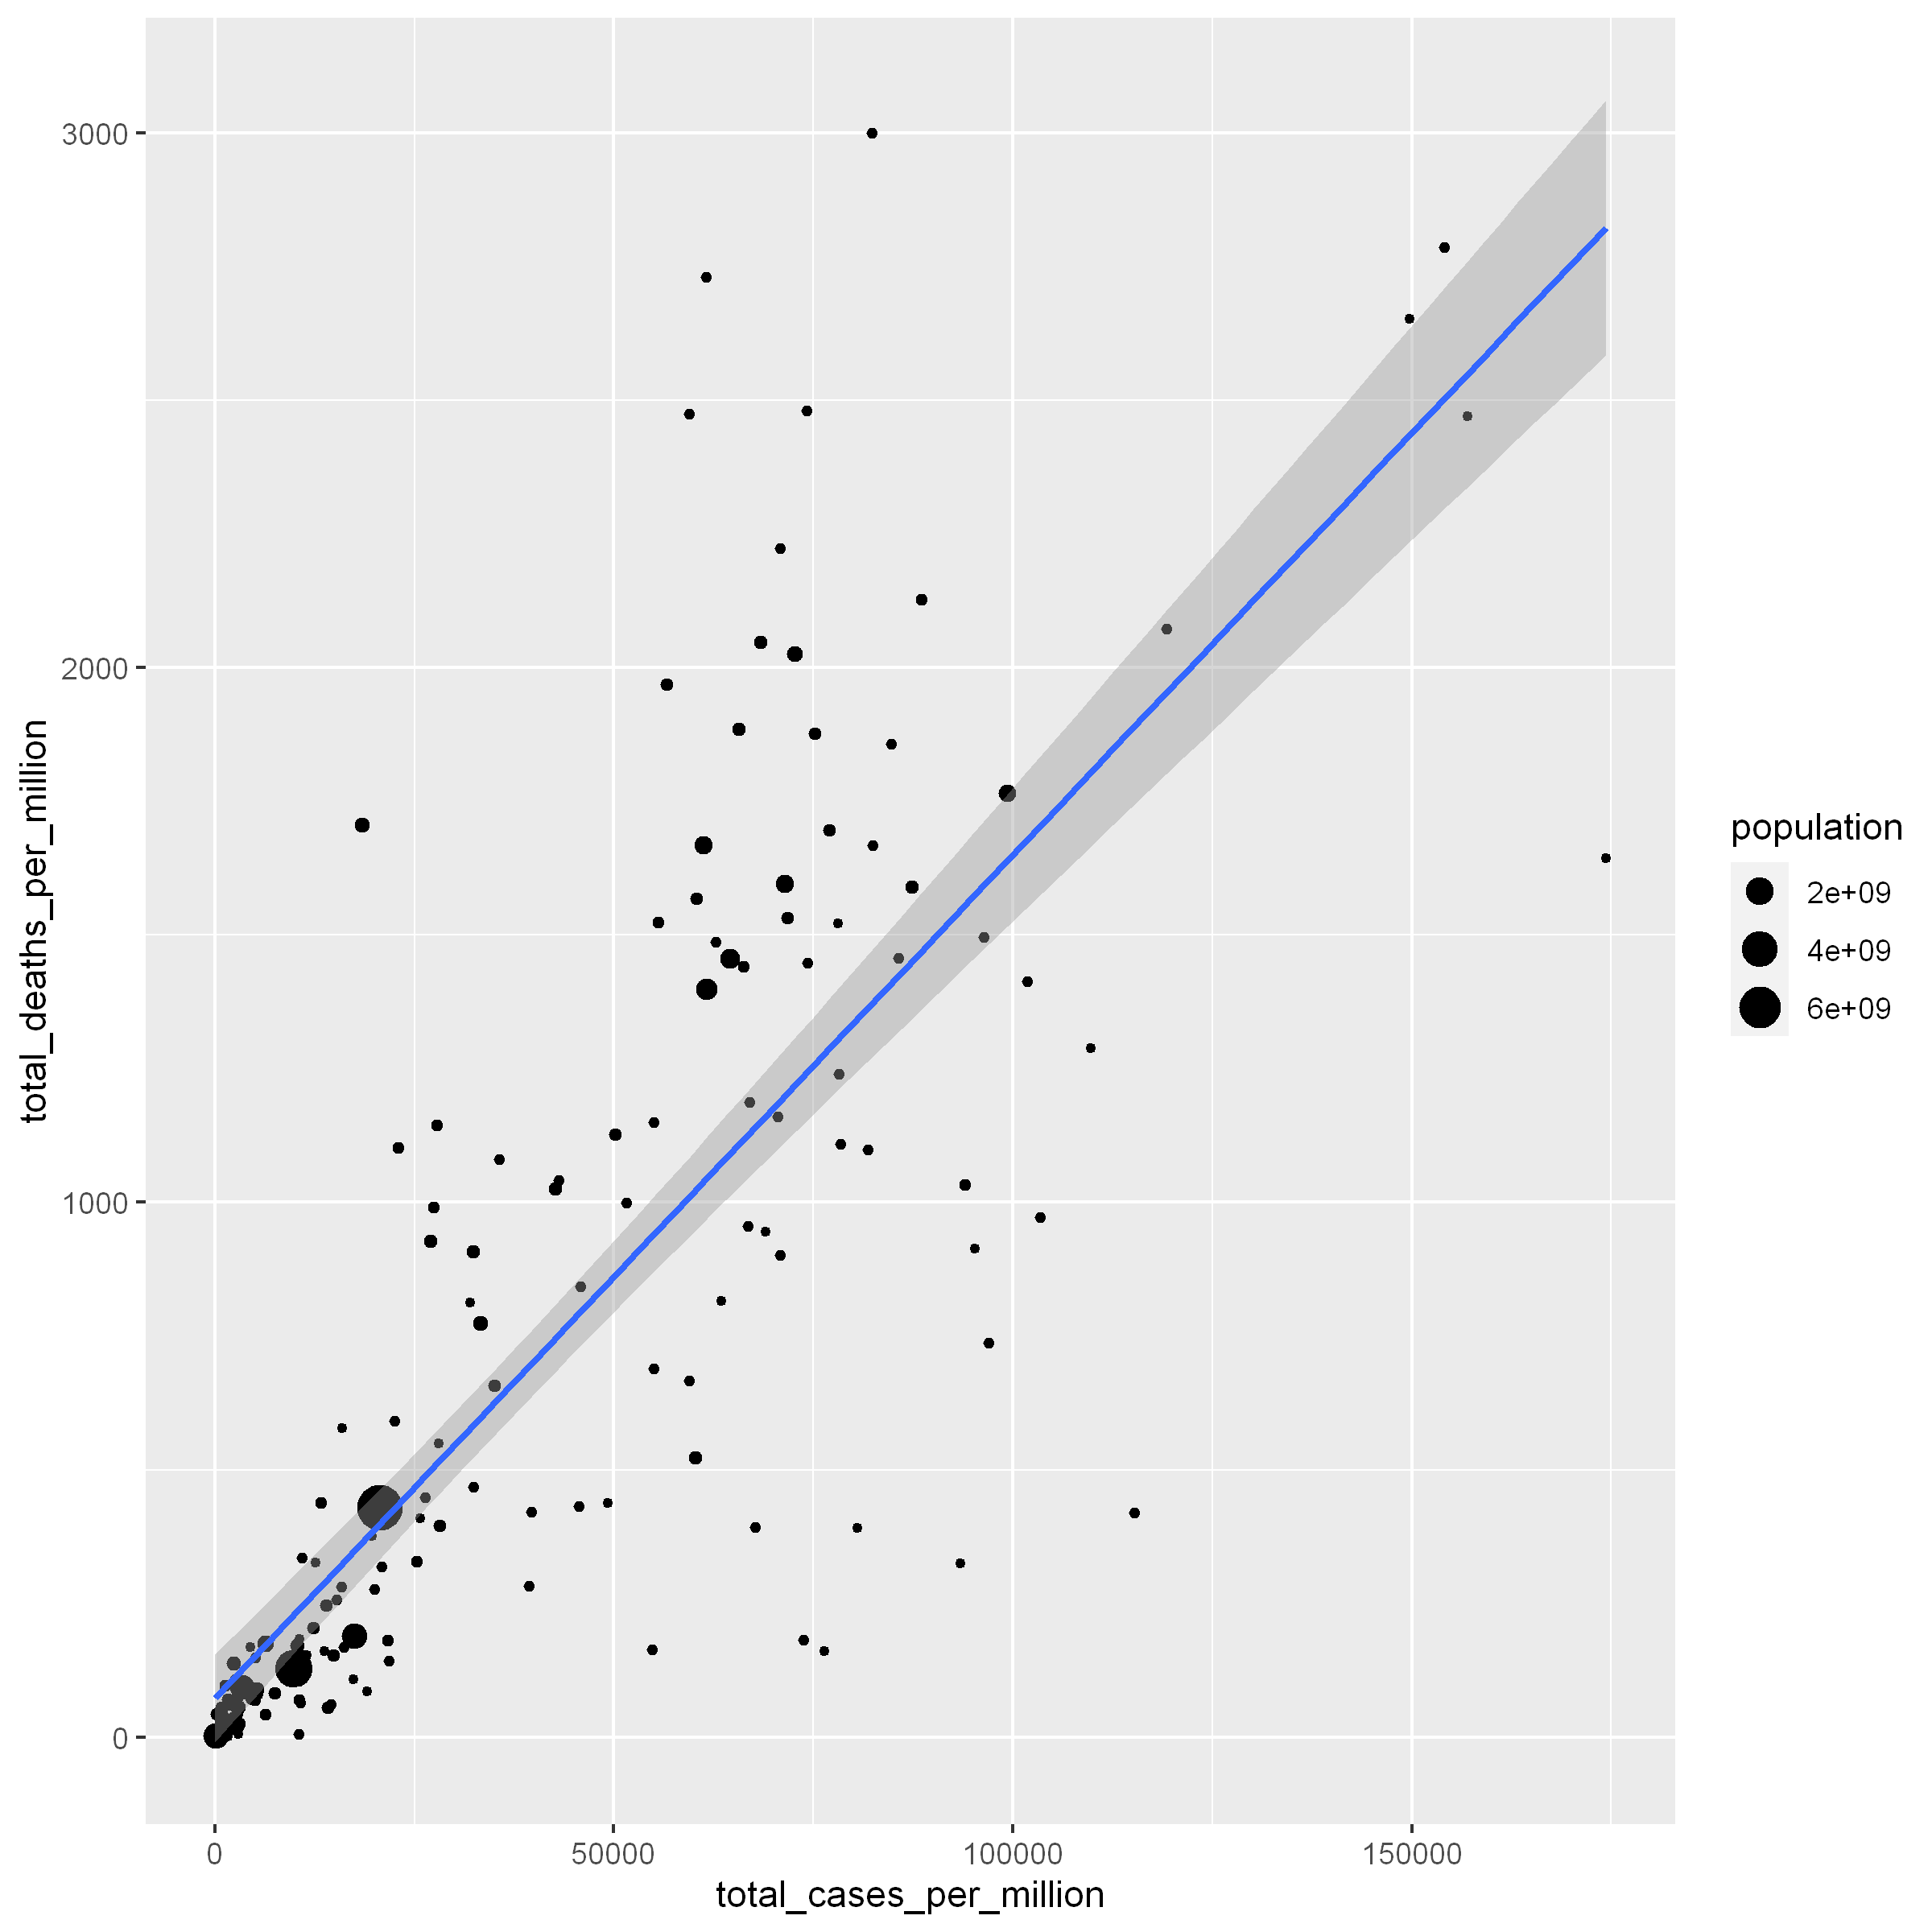

In [20]:
#ggplotly(
    ggplot(factors) +  geom_point(aes(y=total_deaths_per_million,x=total_cases_per_million,text=location,size=population)) +
        geom_smooth(aes(y=total_deaths_per_million,x=total_cases_per_million),method="lm",na.rm=T)
# ,
#    tooltip=c("text","x","y")
#    ) 

In [21]:
lm(ifr~ population,data=factors )


Call:
lm(formula = ifr ~ population, data = factors)

Coefficients:
(Intercept)   population  
  2.161e-02    9.725e-15  


In [22]:
cols

[1] "iso_code"                             
 [2] "continent"                            
 [3] "location"                             
 [4] "date"                                 
 [5] "total_cases"                          
 [6] "new_cases"                            
 [7] "new_cases_smoothed"                   
 [8] "total_deaths"                         
 [9] "new_deaths"                           
[10] "new_deaths_smoothed"                  
[11] "total_cases_per_million"              
[12] "new_cases_per_million"                
[13] "new_cases_smoothed_per_million"       
[14] "total_deaths_per_million"             
[15] "new_deaths_per_million"               
[16] "new_deaths_smoothed_per_million"      
[17] "reproduction_rate"                    
[18] "icu_patients"                         
[19] "icu_patients_per_million"             
[20] "hosp_patients"                        
[21] "hosp_patients_per_million"            
[22] "weekly_icu_admissions"                
[23] "weekly_icu_admissions_per_million"    
[24] "weekly_hosp_admissions"               
[25] "weekly_hosp_admissions_per_million"   
[26] "new_tests"                            
[27] "total_tests"                          
[28] "total_tests_per_thousand"             
[29] "new_tests_per_thousand"               
[30] "new_tests_smoothed"                   
[31] "new_tests_smoothed_per_thousand"      
[32] "positive_rate"                        
[33] "tests_per_case"                       
[34] "tests_units"                          
[35] "total_vaccinations"                   
[36] "people_vaccinated"                    
[37] "people_fully_vaccinated"              
[38] "new_vaccinations"                     
[39] "new_vaccinations_smoothed"            
[40] "total_vaccinations_per_hundred"       
[41] "people_vaccinated_per_hundred"        
[42] "people_fully_vaccinated_per_hundred"  
[43] "new_vaccinations_smoothed_per_million"
[44] "stringency_index"                     
[45] "population"                           
[46] "population_density"                   
[47] "median_age"                           
[48] "aged_65_older"                        
[49] "aged_70_older"                        
[50] "gdp_per_capita"                       
[51] "extreme_poverty"                      
[52] "cardiovasc_death_rate"                
[53] "diabetes_prevalence"                  
[54] "female_smokers"                       
[55] "male_smokers"                         
[56] "handwashing_facilities"               
[57] "hospital_beds_per_thousand"           
[58] "life_expectancy"                      
[59] "human_development_index"

In [23]:
formel <- as.formula(paste("ifr ~", paste(collapse ="+",cols[44:length(cols)],sep=" " )))
formel

ifr ~ stringency_index + population + population_density + median_age + 
    aged_65_older + aged_70_older + gdp_per_capita + extreme_poverty + 
    cardiovasc_death_rate + diabetes_prevalence + female_smokers + 
    male_smokers + handwashing_facilities + hospital_beds_per_thousand + 
    life_expectancy + human_development_index

In [24]:
model <- lm(formel,data=factors)
model


Call:
lm(formula = formel, data = factors)

Coefficients:
               (Intercept)            stringency_index  
                 8.632e-02                  -1.869e-03  
                population          population_density  
                 1.180e-11                  -1.890e-05  
                median_age               aged_65_older  
                 1.702e-03                  -3.196e-02  
             aged_70_older              gdp_per_capita  
                 3.570e-02                  -5.942e-07  
           extreme_poverty       cardiovasc_death_rate  
                -9.859e-04                   6.172e-05  
       diabetes_prevalence              female_smokers  
                 1.318e-03                   3.230e-03  
              male_smokers      handwashing_facilities  
                -3.708e-04                   5.210e-05  
hospital_beds_per_thousand             life_expectancy  
                -4.833e-03                   2.503e-03  
   human_development_index  


In [25]:
summary(model)


Call:
lm(formula = formel, data = factors)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.03574 -0.01321 -0.00460  0.01182  0.06788 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 8.632e-02  1.382e-01   0.624 0.537792    
stringency_index           -1.869e-03  5.002e-04  -3.737 0.000924 ***
population                  1.180e-11  2.352e-11   0.501 0.620262    
population_density         -1.890e-05  2.929e-05  -0.645 0.524369    
median_age                  1.702e-03  3.041e-03   0.560 0.580546    
aged_65_older              -3.196e-02  2.301e-02  -1.389 0.176702    
aged_70_older               3.570e-02  3.049e-02   1.171 0.252223    
gdp_per_capita             -5.942e-07  1.620e-06  -0.367 0.716685    
extreme_poverty            -9.859e-04  4.858e-04  -2.029 0.052789 .  
cardiovasc_death_rate       6.172e-05  6.913e-05   0.893 0.380138    
diabetes_prevalence         1.318e-03  2.396e-03   0.550 0.586890  

# Aufgabe
* Findet mithilfe von Korrelationen und Linearen Modellen im Datensatz enthaltene, lineare Einflussfaktoren auf die Fallzahlen, die Fatalitätsrate oder Impfzahlen. Beachtet dabei auch die Rollen von Ausreißern.
* Erstellt Scatter-Plots für die identifizierten Beziehungen und fügt den Plots relevante Informationen hinzu. 

In [26]:
df_covid %>% head

,ï..ObjectId,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<date>,<int>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<chr>
1,1,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020-09-30,1001,"07.05.2021, 00:00 Uhr",0,-9,2020/09/30 00:00:00+00,0,1,0,Nicht Ã¼bermittelt
2,2,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020-10-29,1001,"07.05.2021, 00:00 Uhr",0,-9,2020/10/29 00:00:00+00,0,1,0,Nicht Ã¼bermittelt
3,3,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020-11-03,1001,"07.05.2021, 00:00 Uhr",0,-9,2020/11/03 00:00:00+00,0,1,0,Nicht Ã¼bermittelt
4,4,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020-11-20,1001,"07.05.2021, 00:00 Uhr",0,-9,2020/11/19 00:00:00+00,0,1,1,Nicht Ã¼bermittelt
5,5,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020-11-23,1001,"07.05.2021, 00:00 Uhr",0,-9,2020/11/18 00:00:00+00,0,1,1,Nicht Ã¼bermittelt
6,6,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020-12-18,1001,"07.05.2021, 00:00 Uhr",0,-9,2020/12/14 00:00:00+00,0,1,1,Nicht Ã¼bermittelt


In [27]:
df_agegroups <- df_covid %>% 
    dplyr::select(c(Altersgruppe,AnzahlFall,AnzahlTodesfall)) %>% 
    tidyr::pivot_longer(cols = Altersgruppe,values_to =  "Altersgruppe")
df_agegroups %>% head

AnzahlFall,AnzahlTodesfall,name,Altersgruppe
<int>,<int>,<chr>,<chr>
1,0,Altersgruppe,A00-A04
1,0,Altersgruppe,A00-A04
1,0,Altersgruppe,A00-A04
1,0,Altersgruppe,A00-A04
1,0,Altersgruppe,A00-A04
1,0,Altersgruppe,A00-A04


In [28]:
df_agegroups  <- df_agegroups %>% 
    group_by(Altersgruppe) %>% 
    summarise(cases = sum(AnzahlFall),deaths=sum(AnzahlTodesfall))
df_agegroups

Altersgruppe,cases,deaths
<chr>,<int>,<int>
A00-A04,86130,8
A05-A14,242809,5
A15-A34,1022746,145
A35-A59,1336170,3231
A60-A79,517722,24216
A80+,282549,56774
unbekannt,3476,15


Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"


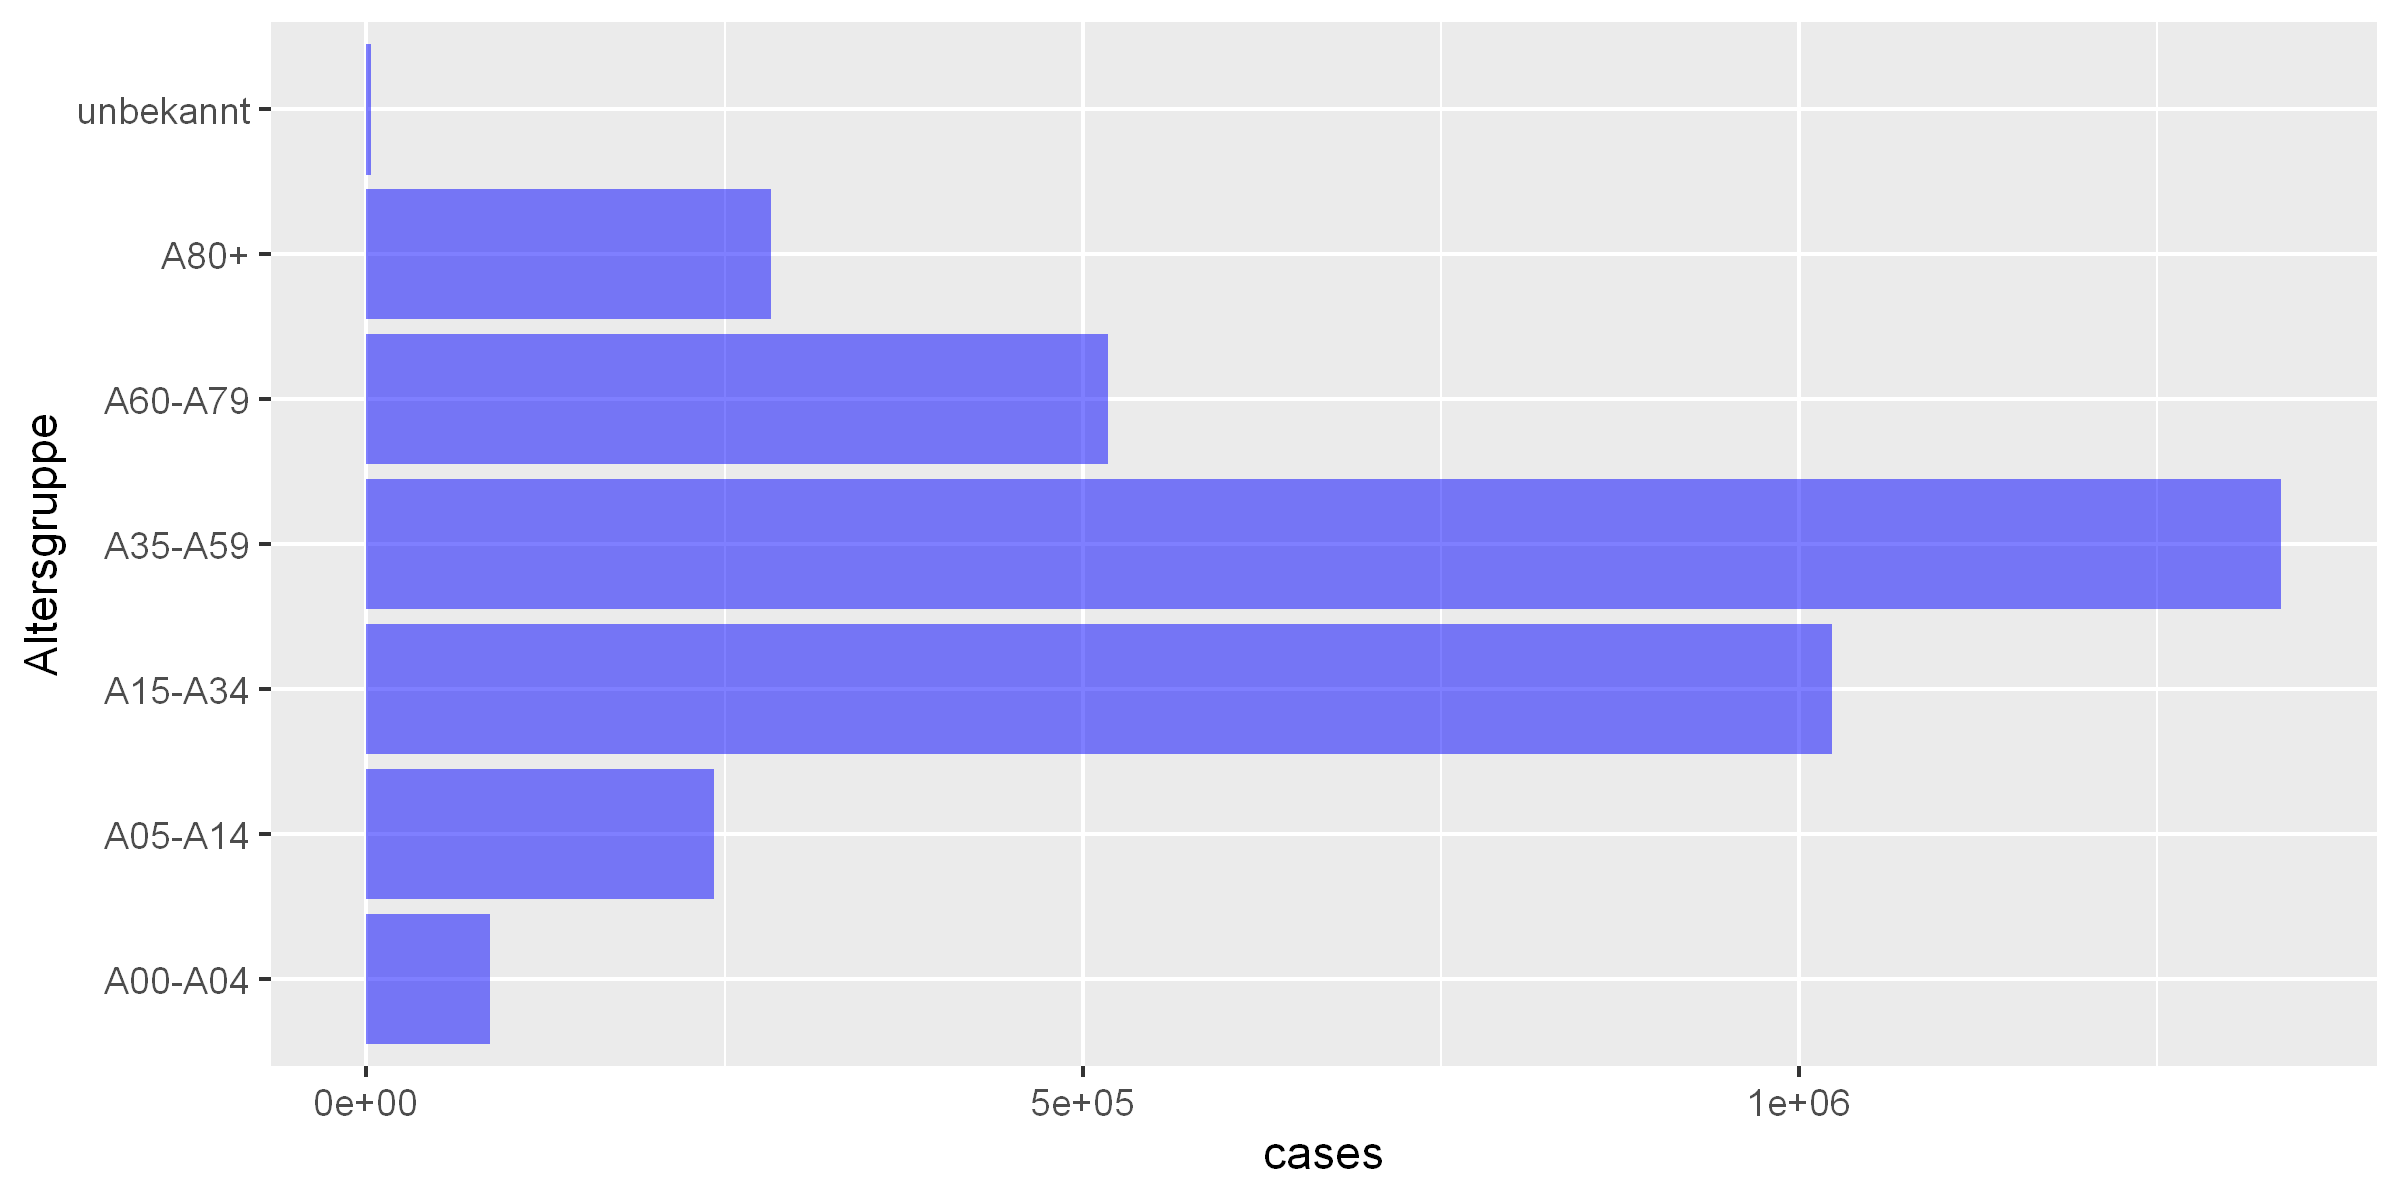

In [29]:
options(repr.plot.width=8, repr.plot.height=4,repr.plot.res = 300)

ggplot(df_agegroups, aes(x=cases, y= Altersgruppe)) +
    geom_histogram(stat="identity",fill="blue",alpha=0.5)

In [30]:
df_agegroups %>% tidyr::pivot_longer(cols = c(cases,deaths),names_to = "category")

Altersgruppe,category,value
<chr>,<chr>,<int>
A00-A04,cases,86130
A00-A04,deaths,8
A05-A14,cases,242809
A05-A14,deaths,5
A15-A34,cases,1022746
A15-A34,deaths,145
A35-A59,cases,1336170
A35-A59,deaths,3231
A60-A79,cases,517722


Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"


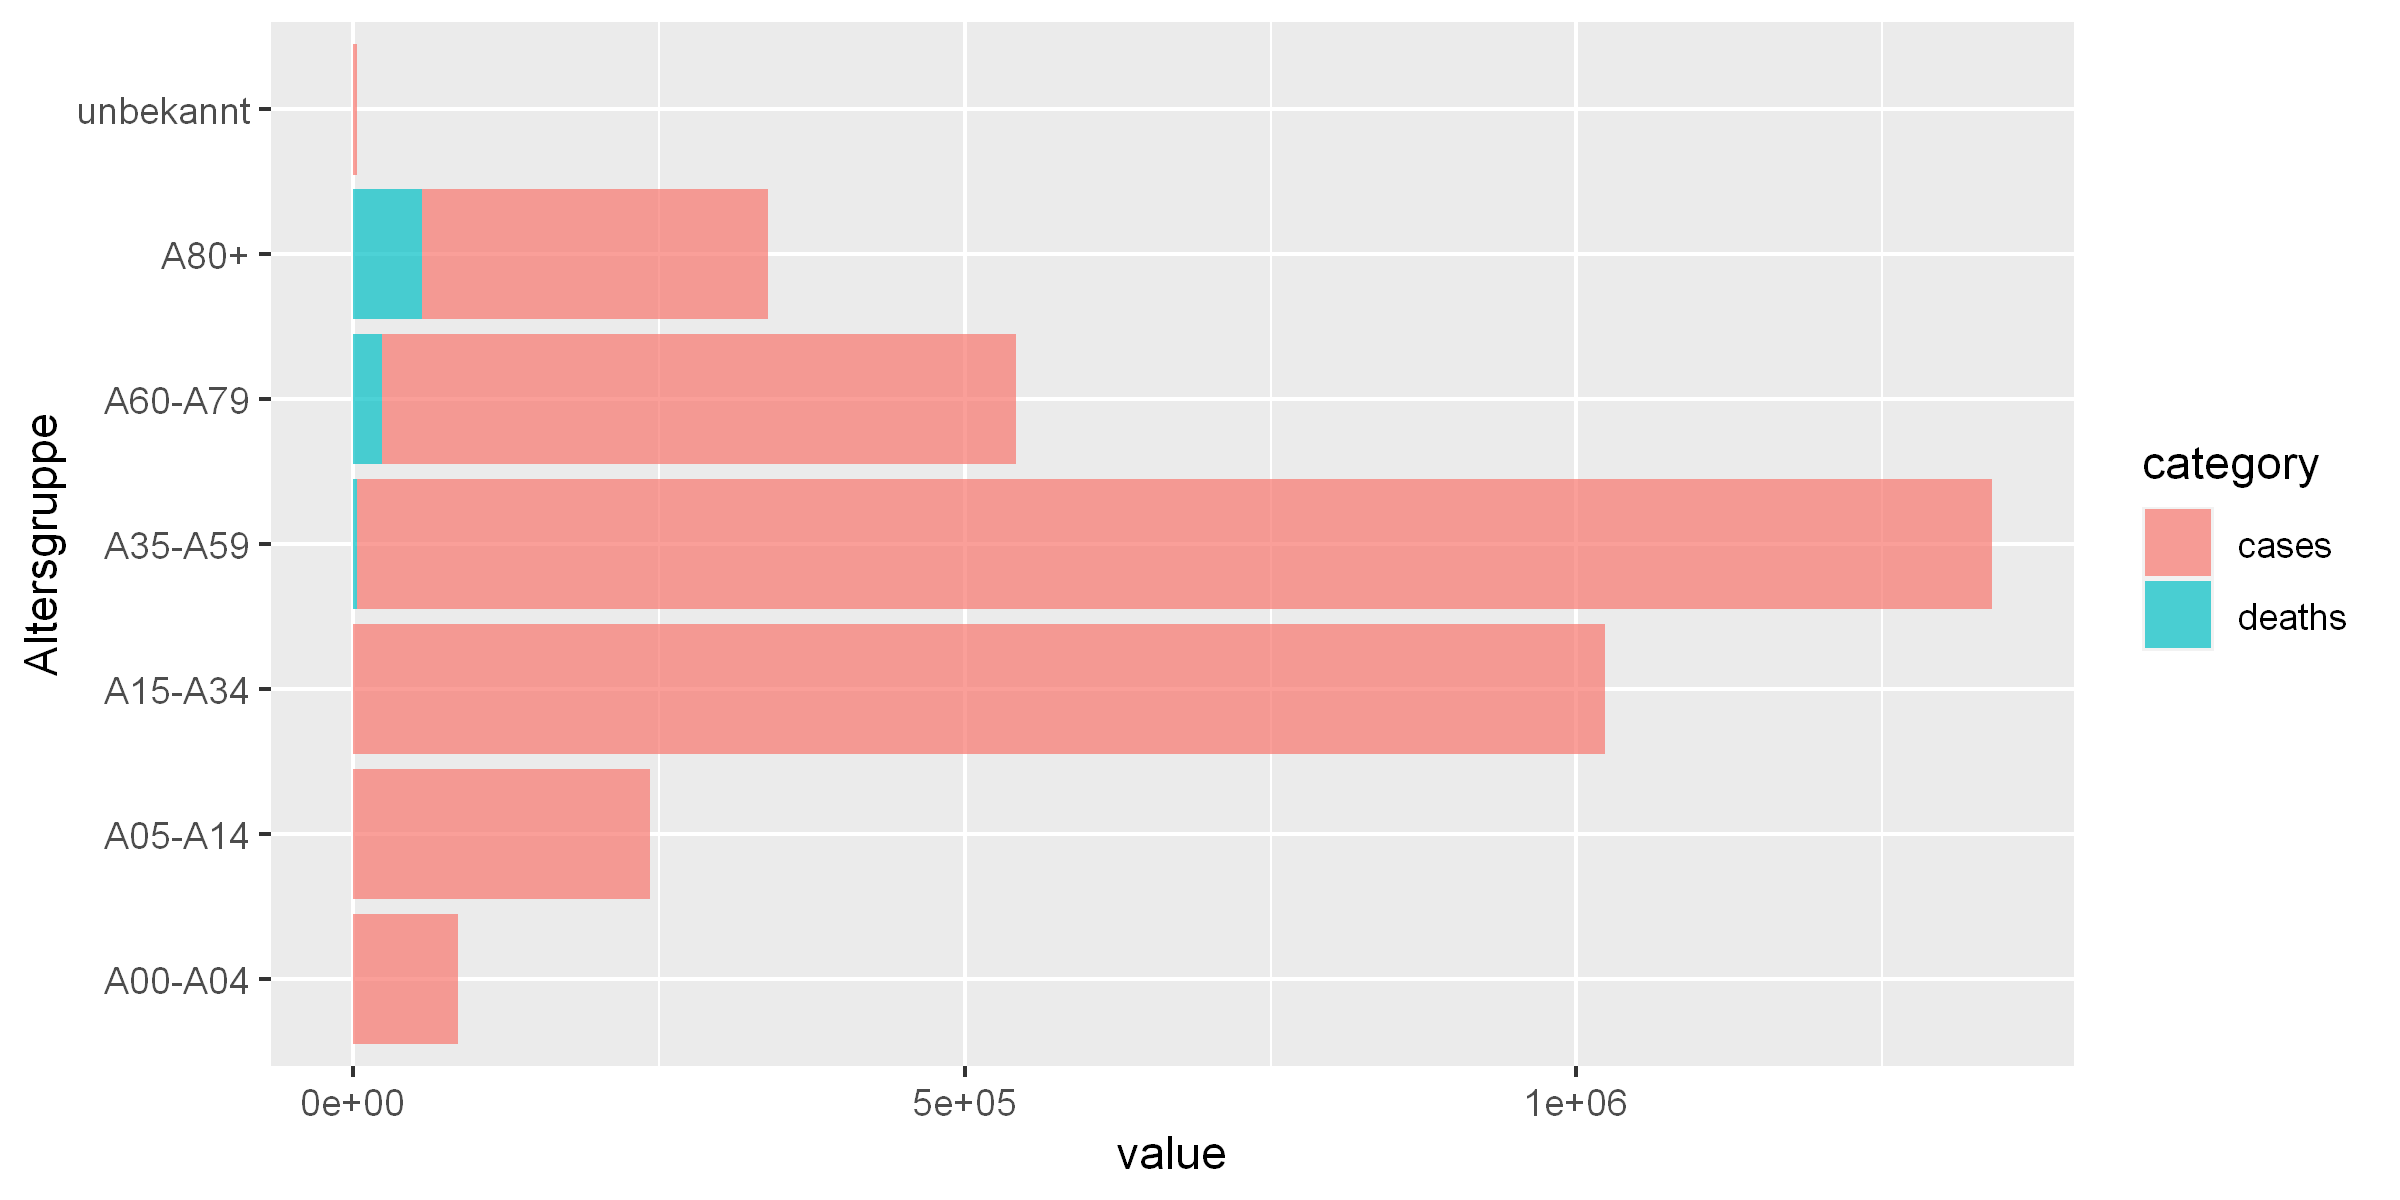

In [31]:
ggplot(
    df_agegroups %>% 
    tidyr::pivot_longer(cols = c(cases,deaths),names_to = "category")
    )+
    geom_histogram(aes(x=value, y= Altersgruppe, fill=category),stat="identity",alpha=0.7)

In [32]:
df_agegroups

Altersgruppe,cases,deaths
<chr>,<int>,<int>
A00-A04,86130,8
A05-A14,242809,5
A15-A34,1022746,145
A35-A59,1336170,3231
A60-A79,517722,24216
A80+,282549,56774
unbekannt,3476,15


In [33]:
bins <- c(0,4,14,34,59,79,100)
df_ages <- integer(0)
for(i in 1:(length(bins)-1) ){
    age_bin  <- seq(bins[i],bins[i+1]-1, by = 1)
    df_ages  <- c(df_ages, sample(age_bin, size =  df_agegroups$cases[i], replace = T ) )
}
head(df_ages)

[1] 0 2 1 0 3 2

In [ ]:
q <- qplot(x=df_ages,geom = "histogram",bins="20",xlab="Age")
q

# Aufgabe
* Erstellt Histogramme für die folgenden Fälle:
    * Die Daten streuen am linken Ende der jeweiligen Altersgruppe.
    * Die Daten streuen am rechten Ende der jeweiligen Altersgruppe.
* Versucht die Daten mithilfe eines Kerndichteschätzers zu glätten. Verwendet dafür die Funktion ksmooth aus dem Paket stats.

*Hinweis:* Eine Funktion $k:\mathbb{R} \to \mathbb{R}$ heißt Kern, falls
\\[ \int k(x) \ \mathrm{d}x = 1.\\]
Für gegebene Daten $x_1,...x_n \in \mathbb{R}$ ist der Kerndichteschätzer zu $k$ mit Bandbreite (bandwidth) $h>0$ definiert als
\\[ K(y) = \frac{1}{n} \sum_{i=1}^n \frac{1}{h} k\left( \frac{y-x}{h}\right),\\]
für $y \in \mathbb{R}$. Dabei definiert $K$ eine Wahrscheinlichkeitsdichte auf $\mathbb{R}$, falls $k>0$.